In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df = pd.read_csv("trend_ekponensil/Data.csv")
df = df.rename(columns={"Biaya Operasional (dalam Milyar)" : "Y"})

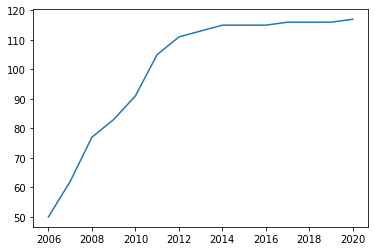

In [3]:
plt.plot(df['TAHUN'],df['Y'])

In [4]:
#menambahkan data x xy dan x^2
def eksponensil(data,name) :
    l = int(len(data))
    if(l % 2 != 0) :
        rlst = [0]
        llst =[]
        for i in range(1,int(l/2)+1):
            rlst.append(i)
            llst.append(-1 * i)
        llst.reverse()
        llst = llst + rlst       
    else :
        rlst = [1]
        llst = [-1]
        st = 3
        for i in range(1,int(l/2)) : 
            rlst.append(st)
            llst.append(-1*st)
            st+=2
        llst.reverse()
        llst = llst + rlst
    

    i = 0 
    xy = []
    xsqr = []
    lgy = []
    xlgy = []

    for x in llst :
        xy.append(x*data['Y'][i].item())
        xsqr.append(x**2)
        lgy.append(math.log(data['Y'][i].item(),10))
        xlgy.append(x*lgy[i])
        i+=1
    data['x'],data['xy'],data['logy'],data['xlogy'],data['X^2']= llst,xy,lgy,xlgy,xsqr
    la = data['logy'].sum()/l
    a = 10 ** la
    lb=data['xlogy'].sum()/data['X^2'].sum()
    b = 10 ** lb
    print("Untuk {}  : \nY\' ={} * {} X ".format(name,a,b))
    return data,a,b

#fungsi forecasting dengan linear least square
def forecasting(data,forecast,a,b) :
    l = int(len(data))
    i=1
    if(l%2==0) : 
        if(forecast < data['TAHUN'][0]) : 
            i = -1
        idx = data[data['x'] == i ].index.values
        xVal =  1 + (forecast - data['TAHUN'][idx].item()-1) * 2 if i>0 else -1 + (data['TAHUN'][idx].item()-forecast-1) * (-2)
        Y = a * b**xVal 
        return Y
    else :
        i = 0
        idx = data[data['x'] == i ].index.values
        xVal =  forecast - data['TAHUN'][idx].item()
        Y = a * b**xVal 
        return Y

In [5]:
df,a1,b1 =  eksponensil(df,"data")
df


Untuk data  : 
Y' =97.2630158549755 * 1.0513359650721226 X 


,TAHUN,Y,x,xy,logy,xlogy,X^2
0,2006,50,-7,-350,1.698970,-11.892790,49
1,2007,62,-6,-372,1.792392,-10.754350,36
2,2008,77,-5,-385,1.886491,-9.432454,25
3,2009,83,-4,-332,1.919078,-7.676312,16
4,2010,91,-3,-273,1.959041,-5.877124,9
5,2011,105,-2,-210,2.021189,-4.042379,4
6,2012,111,-1,-111,2.045323,-2.045323,1
7,2013,113,0,0,2.053078,0.000000,0
8,2014,115,1,115,2.060698,2.060698,1
9,2015,115,2,230,2.060698,4.121396,4


In [6]:
Y = forecasting(df,2021,a1,b1)
print("Perkiraan biata operasional pada tahun 2021 = {}".format(Y))

Perkiraan biata operasional pada tahun 2021 = 145.17101155759727
